In [1]:
import numpy as np
import librosa
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Audio, display
from tqdm import tqdm
import soundfile as sf

# RAVDESS Dataset

In [2]:
ravdess = "RAVDESS"
ravdess_directory_list = os.listdir(ravdess)
print(ravdess_directory_list)
file_emotion = []
file_path = []

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [3]:
# Loop though each actor folder
for folder in ravdess_directory_list:
    actor = os.listdir(ravdess + '/' + folder)

    # extract audio files for each actor folder
    for file in actor:
        part = file.split('.')[0].split('-')
        
        # The third part in each file name represents the emotion of that audio file
        file_emotion.append(int(part[2]))
        file_path.append(ravdess + '/' + folder + '/' + file)

ravdess_df = pd.DataFrame({'Emotion': file_emotion, 
                           'Path': file_path})
ravdess_df

,Emotion,Path
0,1,RAVDESS/Actor_01/03-01-01-01-01-01-01.wav
1,1,RAVDESS/Actor_01/03-01-01-01-01-02-01.wav
2,1,RAVDESS/Actor_01/03-01-01-01-02-01-01.wav
3,1,RAVDESS/Actor_01/03-01-01-01-02-02-01.wav
4,2,RAVDESS/Actor_01/03-01-02-01-01-01-01.wav
...,...,...
1435,8,RAVDESS/Actor_24/03-01-08-01-02-02-24.wav
1436,8,RAVDESS/Actor_24/03-01-08-02-01-01-24.wav
1437,8,RAVDESS/Actor_24/03-01-08-02-01-02-24.wav
1438,8,RAVDESS/Actor_24/03-01-08-02-02-01-24.wav


In [4]:
ravdess_df["Emotion"] = ravdess_df["Emotion"].replace({1: 'neutral',
                                                       2: 'neutral',
                                                       3: 'happy',
                                                       4: 'sad',
                                                       5: 'angry',
                                                       6: 'fearful',
                                                       7: 'disgust',
                                                       8: 'surprised'})
print(ravdess_df["Emotion"].value_counts())

Emotion
neutral      288
happy        192
sad          192
angry        192
fearful      192
disgust      192
surprised    192
Name: count, dtype: int64


# CREMA-D Dataset

In [5]:
crema = 'CREMA-D'
crema_directory_list = os.listdir(crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    part = file.split('.')[0].split('_')
    
    # The third part in each file name represents the emotion of that audio file
    file_emotion.append(part[2])
    file_path.append(crema + '/' + file)

crema_df = pd.DataFrame({'Emotion': file_emotion,
                         'Path': file_path})
crema_df

,Emotion,Path
0,ANG,CREMA-D/1001_DFA_ANG_XX.wav
1,DIS,CREMA-D/1001_DFA_DIS_XX.wav
2,FEA,CREMA-D/1001_DFA_FEA_XX.wav
3,HAP,CREMA-D/1001_DFA_HAP_XX.wav
4,NEU,CREMA-D/1001_DFA_NEU_XX.wav
...,...,...
7437,DIS,CREMA-D/1091_WSI_DIS_XX.wav
7438,FEA,CREMA-D/1091_WSI_FEA_XX.wav
7439,HAP,CREMA-D/1091_WSI_HAP_XX.wav
7440,NEU,CREMA-D/1091_WSI_NEU_XX.wav


In [6]:
crema_df["Emotion"] = crema_df["Emotion"].replace({'ANG': 'angry',
                                                   'DIS': 'disgust',
                                                   'FEA': 'fearful',
                                                   'HAP': 'happy',
                                                   'SAD': 'sad',
                                                   'NEU': 'neutral'})
print(crema_df["Emotion"].value_counts())

Emotion
angry      1271
disgust    1271
fearful    1271
happy      1271
sad        1271
neutral    1087
Name: count, dtype: int64


# SAVEE dataset

In [7]:
savee = 'SAVEE'
savee_directory_list = os.listdir(savee)
print(savee_directory_list)

['DC_a01.wav', 'DC_a02.wav', 'DC_a03.wav', 'DC_a04.wav', 'DC_a05.wav', 'DC_a06.wav', 'DC_a07.wav', 'DC_a08.wav', 'DC_a09.wav', 'DC_a10.wav', 'DC_a11.wav', 'DC_a12.wav', 'DC_a13.wav', 'DC_a14.wav', 'DC_a15.wav', 'DC_d01.wav', 'DC_d02.wav', 'DC_d03.wav', 'DC_d04.wav', 'DC_d05.wav', 'DC_d06.wav', 'DC_d07.wav', 'DC_d08.wav', 'DC_d09.wav', 'DC_d10.wav', 'DC_d11.wav', 'DC_d12.wav', 'DC_d13.wav', 'DC_d14.wav', 'DC_d15.wav', 'DC_f01.wav', 'DC_f02.wav', 'DC_f03.wav', 'DC_f04.wav', 'DC_f05.wav', 'DC_f06.wav', 'DC_f07.wav', 'DC_f08.wav', 'DC_f09.wav', 'DC_f10.wav', 'DC_f11.wav', 'DC_f12.wav', 'DC_f13.wav', 'DC_f14.wav', 'DC_f15.wav', 'DC_h01.wav', 'DC_h02.wav', 'DC_h03.wav', 'DC_h04.wav', 'DC_h05.wav', 'DC_h06.wav', 'DC_h07.wav', 'DC_h08.wav', 'DC_h09.wav', 'DC_h10.wav', 'DC_h11.wav', 'DC_h12.wav', 'DC_h13.wav', 'DC_h14.wav', 'DC_h15.wav', 'DC_n01.wav', 'DC_n02.wav', 'DC_n03.wav', 'DC_n04.wav', 'DC_n05.wav', 'DC_n06.wav', 'DC_n07.wav', 'DC_n08.wav', 'DC_n09.wav', 'DC_n10.wav', 'DC_n11.wav', 'DC_n

In [8]:
file_emotion = []
file_path = []

for file in savee_directory_list:
    part = file.split('.')[0].split('_')
    file_emotion.append(part[1][:-2])
    file_path.append(savee + '/' + file)

savee_df = pd.DataFrame({'Emotion': file_emotion,
                         'Path': file_path})
savee_df


,Emotion,Path
0,a,SAVEE/DC_a01.wav
1,a,SAVEE/DC_a02.wav
2,a,SAVEE/DC_a03.wav
3,a,SAVEE/DC_a04.wav
4,a,SAVEE/DC_a05.wav
...,...,...
475,su,SAVEE/KL_su11.wav
476,su,SAVEE/KL_su12.wav
477,su,SAVEE/KL_su13.wav
478,su,SAVEE/KL_su14.wav


In [9]:
savee_df["Emotion"] = savee_df["Emotion"].replace({'n': 'neutral',
                          'd': 'disgust',
                          'a': 'angry',
                          'f': 'fearful',
                          'h': 'happy',
                          'sa': 'sad',
                          'su': 'surprised'})
print(savee_df["Emotion"].value_counts())

Emotion
neutral      120
angry         60
disgust       60
fearful       60
happy         60
sad           60
surprised     60
Name: count, dtype: int64


# TESS Dataset

In [10]:
tess = 'TESS'
tess_directory_list = os.listdir(tess)
print(tess_directory_list)

['OAF_angry', 'OAF_disgust', 'OAF_Fear', 'OAF_happy', 'OAF_neutral', 'OAF_Pleasant_surprise', 'OAF_Sad', 'YAF_angry', 'YAF_disgust', 'YAF_fear', 'YAF_happy', 'YAF_neutral', 'YAF_pleasant_surprised', 'YAF_sad']


In [11]:
file_emotion = []
file_path = []

# Loop though each emotion folder
for folder in tess_directory_list:
    files = os.listdir(tess + '/' + folder)

    # Extract each audio file
    for file in files:
        part = file.split('.')[0].split('_')
        file_emotion.append(part[2])
        file_path.append(tess + '/' + folder + '/' + file)

tess_df = pd.DataFrame({'Emotion': file_emotion,
                        'Path': file_path})
tess_df

,Emotion,Path
0,angry,TESS/OAF_angry/OAF_back_angry.wav
1,angry,TESS/OAF_angry/OAF_bar_angry.wav
2,angry,TESS/OAF_angry/OAF_base_angry.wav
3,angry,TESS/OAF_angry/OAF_bath_angry.wav
4,angry,TESS/OAF_angry/OAF_bean_angry.wav
...,...,...
2795,sad,TESS/YAF_sad/YAF_witch_sad.wav
2796,sad,TESS/YAF_sad/YAF_yearn_sad.wav
2797,sad,TESS/YAF_sad/YAF_yes_sad.wav
2798,sad,TESS/YAF_sad/YAF_young_sad.wav


In [12]:
tess_df["Emotion"] = tess_df["Emotion"].replace({'fear': 'fearful',
                         'ps': 'surprised'})
print(tess_df["Emotion"].value_counts())

Emotion
angry        400
disgust      400
fearful      400
happy        400
neutral      400
surprised    400
sad          400
Name: count, dtype: int64


# Combining Datasets

In [13]:
combined_df = pd.concat([ravdess_df, savee_df, tess_df, crema_df])
print(combined_df["Emotion"].value_counts())

Emotion
happy        1923
sad          1923
angry        1923
fearful      1923
disgust      1923
neutral      1895
surprised     652
Name: count, dtype: int64


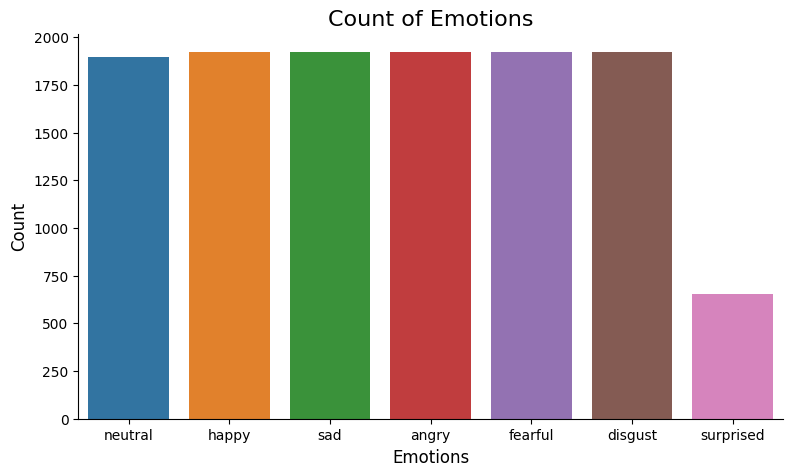

In [14]:
fig = plt.figure(figsize=(20, 5))

fig.add_subplot(121)
plt.title('Count of Emotions', size=16)
sns.countplot(x=combined_df["Emotion"], hue=combined_df["Emotion"], legend=False)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)

# Class Balancing

In [15]:
def augment(y, sr, rate, n_steps):
    stretched = librosa.effects.time_stretch(y=y, rate=rate)
    pitched = librosa.effects.pitch_shift(y=y, sr=sr, n_steps=n_steps)
    return stretched, pitched

In [16]:
def balance_class(df, emotion, target_count, rate, n_steps, save_dir):
    os.makedirs(save_dir, exist_ok=True)
    emotion_rows = df[df["Emotion"] == emotion]
    total_needed = target_count - len(emotion_rows)

    augmented_rows = []
    for _, row in tqdm(emotion_rows.iterrows(), total=len(emotion_rows)):
        audio_path = row["Path"]
        y, sr = librosa.load(audio_path, sr=None)

        # Apply augmentations
        stretched, pitched = augment(y, sr, rate, n_steps)

        # Save stretched
        stretched_filename = os.path.join(save_dir, os.path.basename(audio_path).replace(".wav", "_stretched.wav"))
        sf.write(stretched_filename, stretched, sr)

        # Save pitched
        pitched_filename = os.path.join(save_dir, os.path.basename(audio_path).replace(".wav", "_pitched.wav"))
        sf.write(pitched_filename, pitched, sr)

        augmented_rows.append({"Emotion": emotion, "Path": stretched_filename})
        augmented_rows.append({"Emotion": emotion, "Path": pitched_filename})
        total_needed -= 2
        if total_needed <= 0:
            break
    
    augmented_df = pd.DataFrame(augmented_rows)

    return augmented_df

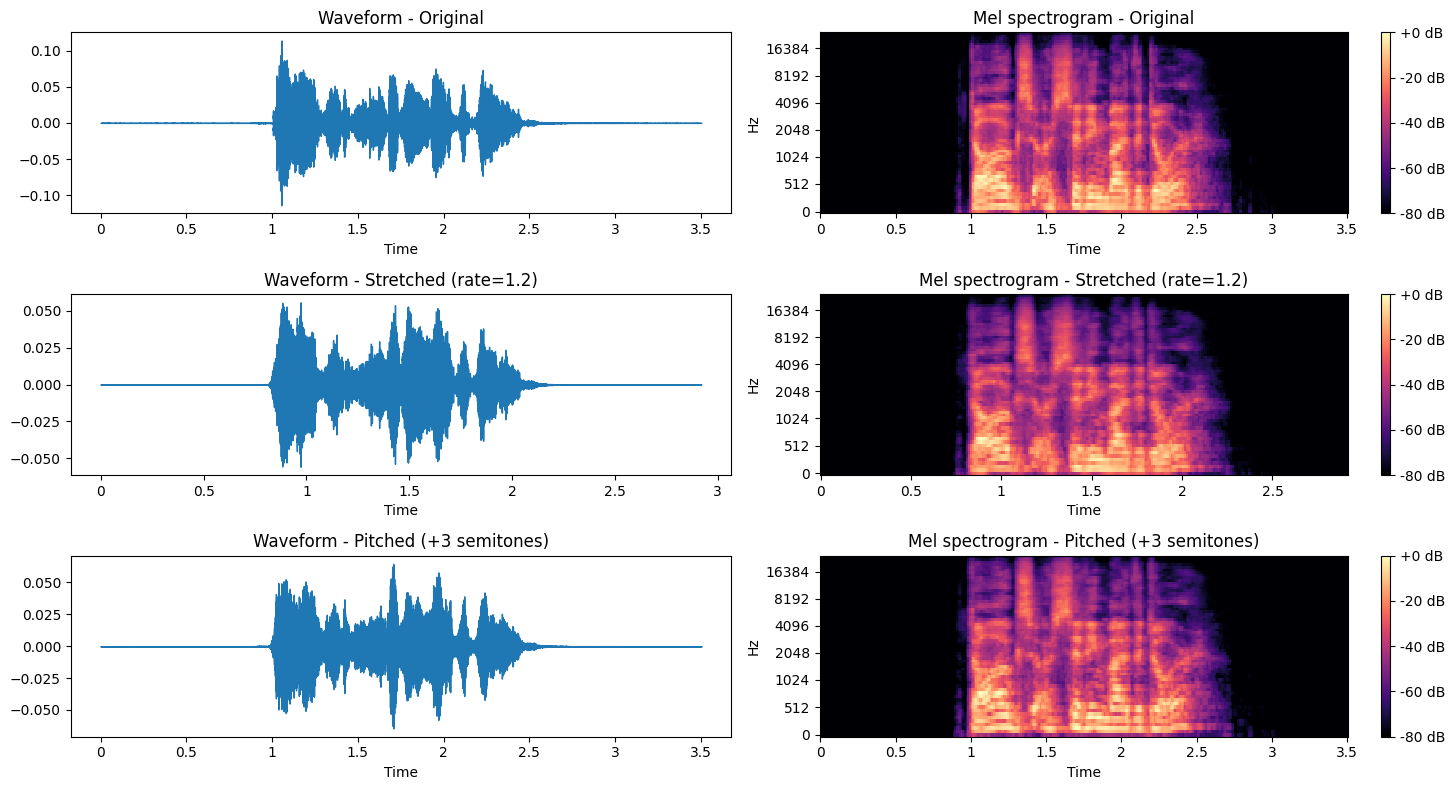

Original Audio:



Stretched Audio (rate=1.2):



Pitched Audio (+3 semitones):


In [ ]:
# Sample augmented surprised audio
example_file = combined_df[combined_df["Emotion"] == "surprised"]["Path"].iloc[6]
y, sr = librosa.load(example_file, sr=None)

stretched, pitched = augment(y, sr, rate=1.2, n_steps=3)

plt.figure(figsize=(15, 8))
for i, (title, data) in enumerate([
    ("Original", y),
    ("Stretched (rate=1.2)", stretched),
    ("Pitched (+3 semitones)", pitched)
]):
    # Waveform
    plt.subplot(3, 2, 2 * i + 1)
    librosa.display.waveshow(data, sr=sr)
    plt.title(f"Waveform - {title}")

    # Mel spectrogram
    plt.subplot(3, 2, 2 * i + 2)
    S = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=64)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format="%+2.f dB")
    plt.title(f"Mel spectrogram - {title}")

plt.tight_layout()
plt.show()

# Play the examples
print("Original Audio:")
display(Audio(y, rate=sr))

print("Stretched Audio (rate=1.2):")
display(Audio(stretched, rate=sr))

print("Pitched Audio (+3 semitones):")
display(Audio(pitched, rate=sr))

In [18]:
aug_surprised = balance_class(combined_df, "surprised", target_count=1923, rate=1.2, n_steps=3, save_dir="augmented_data/surprised")
aug_neutral = balance_class(combined_df, "neutral", target_count=1923, rate=1.2, n_steps=3, save_dir="augmented_data/neutral")

  1%|          | 13/1895 [00:01<02:46, 11.31it/s]


In [19]:
# Final balanced dataset
balanced_df = pd.concat([combined_df, aug_surprised, aug_neutral]).reset_index(drop=True)

print(balanced_df["Emotion"].value_counts())

balanced_df

Emotion
surprised    1924
neutral      1923
happy        1923
sad          1923
angry        1923
fearful      1923
disgust      1923
Name: count, dtype: int64


,Emotion,Path
0,neutral,RAVDESS/Actor_01/03-01-01-01-01-01-01.wav
1,neutral,RAVDESS/Actor_01/03-01-01-01-01-02-01.wav
2,neutral,RAVDESS/Actor_01/03-01-01-01-02-01-01.wav
3,neutral,RAVDESS/Actor_01/03-01-01-01-02-02-01.wav
4,neutral,RAVDESS/Actor_01/03-01-02-01-01-01-01.wav
...,...,...
13457,neutral,augmented_data/neutral\03-01-02-02-02-02-01_pi...
13458,neutral,augmented_data/neutral\03-01-01-01-01-01-02_st...
13459,neutral,augmented_data/neutral\03-01-01-01-01-01-02_pi...
13460,neutral,augmented_data/neutral\03-01-01-01-01-02-02_st...


In [20]:
# replace all backslashes with forward slashes
balanced_df["Path"] = balanced_df["Path"].str.replace("\\", "/", regex=False)
balanced_df

,Emotion,Path
0,neutral,RAVDESS/Actor_01/03-01-01-01-01-01-01.wav
1,neutral,RAVDESS/Actor_01/03-01-01-01-01-02-01.wav
2,neutral,RAVDESS/Actor_01/03-01-01-01-02-01-01.wav
3,neutral,RAVDESS/Actor_01/03-01-01-01-02-02-01.wav
4,neutral,RAVDESS/Actor_01/03-01-02-01-01-01-01.wav
...,...,...
13457,neutral,augmented_data/neutral/03-01-02-02-02-02-01_pi...
13458,neutral,augmented_data/neutral/03-01-01-01-01-01-02_st...
13459,neutral,augmented_data/neutral/03-01-01-01-01-01-02_pi...
13460,neutral,augmented_data/neutral/03-01-01-01-01-02-02_st...


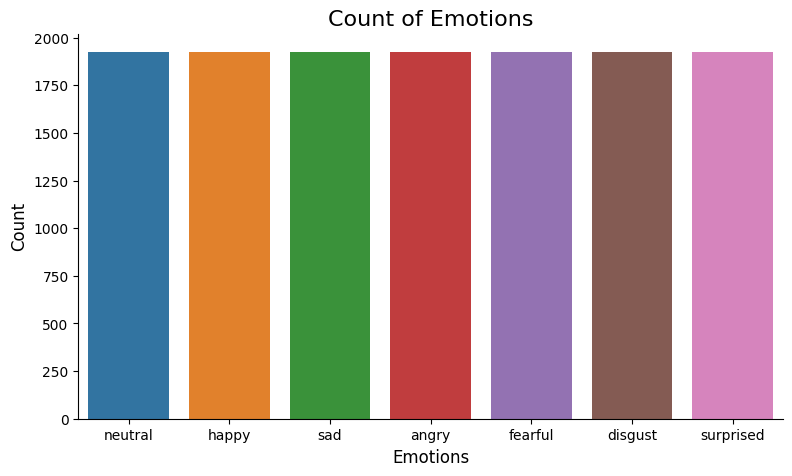

In [21]:
fig = plt.figure(figsize=(20, 5))

fig.add_subplot(121)
plt.title('Count of Emotions', size=16)
sns.countplot(x=balanced_df["Emotion"], hue=balanced_df["Emotion"], legend=False)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)

In [22]:
# Save to CSV
balanced_df.to_csv("balanced_audio_dataset.csv", index=False)